In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
import seaborn as sns
from datetime import datetime
import os

In [4]:
file=os.path.join("..","Homework-07-Group Project","Stock Betas.csv")
stock_prices=os.path.join("..","Homework-07-Group Project","Stock Prices.csv")

In [5]:
# get SPF500 sector
stc_inst=pd.read_csv("Stock Betas.csv")
stc_nm=stc_inst["Security"]
# type(stc_nm)
stock_name=stc_nm.tolist()
stock_name
stc_inst.head()

,Security,Title,Industry,Headquarters Location,Date first added,Beta long term,Beta current time
0,MMM,3M Company,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",0.82,0.59
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",0.83,0.52
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals,"North Chicago, Illinois",0.88,0.79
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment,"Danvers, Massachusetts",NaN,NaN
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",1.03,1.00


In [6]:
fin_stc=stc_inst[stc_inst["Industry"]=="Financials"]
fin_lst=fin_stc["Security"].tolist()
fin_stc

,Security,Title,Industry,Headquarters Location,Date first added,Beta long term,Beta current time
10,AFL,AFLAC Inc,Financials,Life & Health Insurance,"Columbus, Georgia",NaN,NaN
23,ALL,Allstate Corp,Financials,Property & Casualty Insurance,"Northfield Township, Illinois",0.97,1.24
32,AXP,American Express Co,Financials,Consumer Finance,"New York, New York",1.35,1.73
33,AIG,American International Group,Financials,Property & Casualty Insurance,"New York, New York",1.44,2.50
36,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,"Minneapolis, Minnesota",NaN,NaN
44,AON,Aon plc,Financials,Insurance Brokers,"London, United Kingdom",NaN,NaN
53,AJG,Arthur J. Gallagher & Co.,Financials,Insurance Brokers,"Itasca, Illinois",NaN,NaN
54,AIZ,Assurant,Financials,Multi-line Insurance,"New York, New York",NaN,NaN
64,BAC,Bank of America Corp,Financials,Diversified Banks,"Charlotte, North Carolina",1.38,1.31
65,BK,The Bank of New York Mellon Corp.,Financials,Asset Management & Custody Banks,"New York, New York",1.10,1.16


# Using API to pull the stock price

In [7]:
import pandas as pd
import requests

demo ='a74a4e302cd75c0ed624cacc4762e0e6'

companies = stock_name

listofdf = []



for item in companies:
    try:
        histprices = requests.get(f"https://fmpcloud.io/api/v3/historical-price-full/{item}?serietype=line&apikey={demo}")
        histprices = histprices.json()
        histprices = histprices['historical'][["date"]>="2020-02-28"]
        histpricesdf = pd.DataFrame.from_dict(histprices)
        histpricesdf = histpricesdf.rename({'close': item}, axis=1) 
        listofdf.append(histpricesdf)
    except Exception:
        pass

dfs = [df.set_index('date') for df in listofdf]
histpriceconcat = pd.concat(dfs,axis=1)
    
    

KeyboardInterrupt: 

In [ ]:
# print(json.dumps(histprices, indent=4))

In [ ]:
# histpriceconcat.reset_index(inplace=True)
# histpriceconcat.rename(columns={"index":"date"},inplace=True)
# # histpriceconcat

In [ ]:
# his_smp=histpriceconcat[(histpriceconcat["date"]>="2020-02-28") &(histpriceconcat["date"]<="2020-04-9")]
# his_smp

In [8]:
stock_price=pd.read_csv("Stock Prices.csv")
# stock_price.set_index("Date")

In [9]:
stock_price.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XLNX.5,XOM.5,XRAY.5,XRX.5,XYL.5,YUM.5,ZBH.5,ZBRA.5,ZION.5,ZTS.5
0,1/31/2020,82.350426,26.741179,131.378830,308.777191,79.829422,85.184814,186.289993,86.774590,204.288239,...,5043400.0,34282900.0,1625800.0,2335900.0,1553200.0,2117400.0,1407700.0,335900.0,1880800.0,2582300.0
1,2/3/2020,81.941467,27.059999,132.276291,307.929199,81.090614,85.324196,185.949997,86.694923,206.866592,...,4640600.0,27397300.0,1324000.0,1839500.0,1259300.0,1671000.0,1905600.0,262400.0,2642600.0,2377000.0
2,2/4/2020,83.307983,28.430000,131.189362,318.095062,83.120338,87.703720,190.899994,87.860023,211.575348,...,3275900.0,31922100.0,1081700.0,2661900.0,1380900.0,1595500.0,3068300.0,251100.0,2292300.0,1839800.0
3,2/5/2020,84.714409,29.100000,136.633987,320.688934,85.356979,91.039032,190.729996,89.184441,211.266739,...,3477000.0,32099200.0,1084000.0,2328500.0,1803700.0,1814400.0,1364100.0,244200.0,2326100.0,1507600.0
4,2/6/2020,84.604691,28.299999,133.991440,324.440002,85.898903,92.074471,196.009995,89.094818,213.198029,...,2777400.0,16055400.0,938400.0,2313700.0,5052400.0,3271600.0,1185700.0,407500.0,2144200.0,2206800.0


In [10]:
sub_stock=pd.DataFrame(stock_price,columns=stock_name)
sub_stock["date"]=stock_price["Date"]
sub_st=sub_stock.set_index("date")
sub_st.head()
stc_chg=sub_st.pct_change()

stc_chg.drop(stc_chg.index[0],inplace=True)
stc_chg.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2/3/2020,-0.013047,-0.000918,0.015799,-0.001825,0.012621,-0.004617,0.019536,0.021702,0.006831,0.022659,...,0.019182,0.003758,0.020242,0.006747,0.020573,0.006051,0.014769,0.004124,0.013629,0.009761
2/4/2020,0.004151,0.013439,0.025030,0.026620,0.022762,0.017179,0.024413,0.029779,-0.008217,0.014771,...,0.032042,-0.002160,0.007716,0.008583,0.038037,0.002819,0.021934,0.055619,0.012362,0.025458
2/5/2020,0.032371,0.015074,0.026908,-0.000891,-0.001459,-0.006080,-0.003245,0.007887,0.041502,0.007278,...,-0.003165,0.000000,0.028712,0.028561,0.012715,0.000656,-0.000242,0.005932,0.028492,-0.007772
2/6/2020,0.003450,-0.001005,0.006349,0.027683,0.009141,0.023959,0.005225,-0.010433,-0.019340,-0.008671,...,0.014439,0.000000,0.001595,-0.005780,-0.051250,-0.028470,0.017271,0.008307,-0.020829,0.007832
2/7/2020,-0.017251,-0.017883,0.058614,-0.046426,-0.012047,0.021075,-0.003728,0.008313,-0.010717,-0.003887,...,-0.054251,-0.008514,-0.013535,-0.023940,0.012993,-0.016387,-0.019160,-0.016477,-0.016592,-0.000504


In [11]:
sub_st.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
1/31/2020,157.236130,86.774590,79.829422,186.289993,204.288239,58.097900,351.140015,47.000000,131.378830,19.860001,...,125.110161,68.744751,35.117916,84.114929,81.408234,105.298073,239.020004,147.533401,45.155808,133.993210
2/3/2020,155.184692,86.694923,81.090614,185.949997,206.866592,57.829662,358.000000,48.020000,132.276291,20.309999,...,127.510017,69.003075,35.828766,84.682465,83.083054,105.935226,242.550003,148.141892,45.771252,135.301086
2/4/2020,155.828873,87.860023,83.120338,190.899994,211.575348,58.823128,366.739990,49.450001,131.189362,20.610001,...,131.595734,68.854042,36.105206,85.409309,86.243279,106.233887,247.869995,156.381439,46.337063,138.745514
2/5/2020,160.873184,89.184441,85.356979,190.729996,211.266739,58.465481,365.549988,49.840000,136.633987,20.760000,...,131.179230,68.854042,37.141857,87.848724,87.339890,106.303574,247.809998,157.309128,47.657288,137.667252
2/6/2020,161.428162,89.094818,85.898903,196.009995,213.198029,59.866268,367.459992,49.320000,133.991440,20.580000,...,133.073334,68.854042,37.201096,87.340927,82.863731,103.277138,252.089996,158.615875,46.664635,138.745514


In [12]:
stc_chg=stc_chg.T
stc_chg.reset_index(inplace=True)
stc_chg.rename(columns={"index":"Ticker"},inplace=True)
stc_chg.head(5)

date,Ticker,2/3/2020,2/4/2020,2/5/2020,2/6/2020,2/7/2020,2/10/2020,2/11/2020,2/12/2020,2/13/2020,...,3/31/2020,4/1/2020,4/2/2020,4/3/2020,4/6/2020,4/7/2020,4/8/2020,4/9/2020,4/13/2020,4/14/2020
0,MMM,-0.013047,0.004151,0.032371,0.003450,-0.017251,0.000437,0.014362,0.008310,-0.015832,...,-0.008930,-0.024687,0.035827,-0.029875,0.051648,0.027719,0.030360,-0.008121,-0.009338,0.0
1,ABT,-0.000918,0.013439,0.015074,-0.001005,-0.017883,0.004894,0.009853,-0.004261,-0.001239,...,-0.005420,-0.029654,0.037482,0.000126,0.041284,-0.009670,0.036861,0.012831,-0.002208,0.0
2,ABBV,0.015799,0.025030,0.026908,0.006349,0.058614,0.026655,0.013193,0.018646,-0.024951,...,0.012626,-0.036357,0.023291,-0.023426,0.032166,-0.004490,0.042048,0.015148,0.006897,0.0
3,ABMD,-0.001825,0.026620,-0.000891,0.027683,-0.046426,-0.068643,0.009995,-0.050506,-0.012819,...,-0.025706,-0.004685,-0.008306,-0.013121,0.062659,0.016771,0.022843,0.024381,-0.023051,0.0
4,ACN,0.012621,0.022762,-0.001459,0.009141,-0.012047,0.004585,-0.001929,-0.000707,0.001934,...,-0.038629,-0.052554,0.010279,-0.026365,0.091357,-0.011623,0.046368,0.036045,-0.030070,0.0


In [13]:
stcchg_ind=stc_chg.merge(stc_inst, left_on="Ticker",right_on="Security")
stcchg_avg=stcchg_ind.groupby("Industry").sum()
stcchg_avg=stcchg_avg.T
stcchg_avg.sample()

Industry,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2/4/2020,0.386312,1.027047,0.147749,0.300582,0.735834,1.033679,1.408823,1.581504,0.60457,0.368461,-0.255911


In [14]:
stcchg_ind=stc_chg.merge(stc_inst, left_on="Ticker",right_on="Security")
stcchg_avg=stcchg_ind.groupby("Industry").mean()
stcchg_avg=stcchg_avg.T
stcchg_avg.sample()

Industry,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
2/13/2020,-0.003035,-0.005876,0.001283,-0.004638,0.001417,-0.002355,-0.005733,-0.00028,-0.011162,0.007108,0.009081


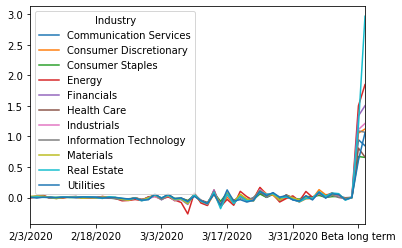

In [15]:
barplot=stcchg_avg.plot.line()

# Boxplots for different sectors

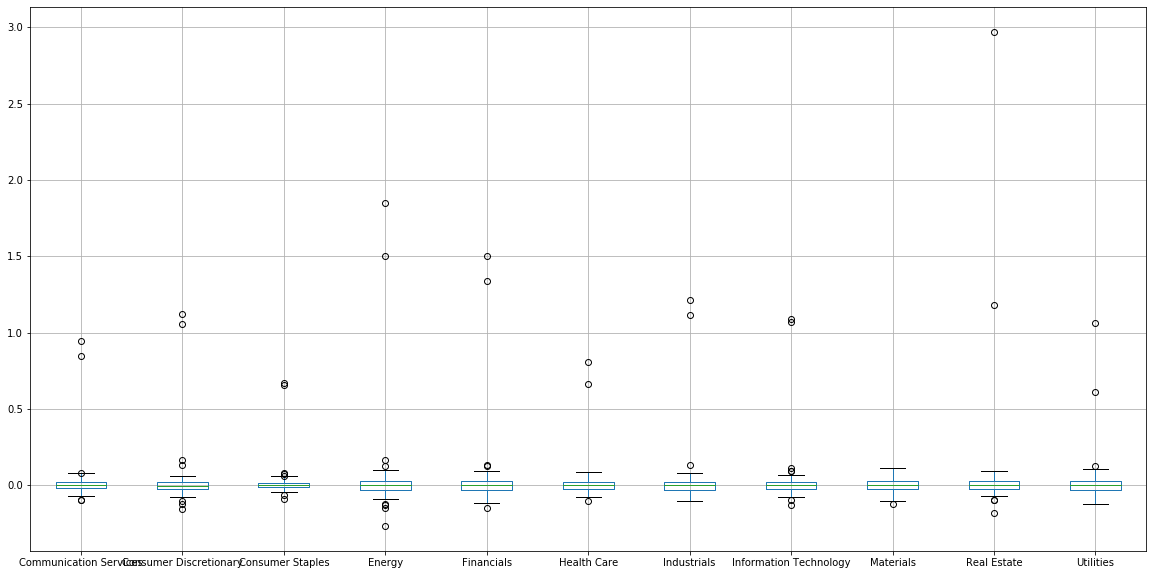

In [16]:
plt.figure(figsize=(20,10))
stcchg_avg.boxplot()

In [17]:
stcchg_avg.bar(figsize=(15,10))

AttributeError: 'DataFrame' object has no attribute 'bar'

# Financials Industry outliers

In [18]:
fin_stc=stcchg_ind[stcchg_ind["Industry"]=="Financials"]
fin_stc.set_index("Ticker",inplace=True)
# fin_stc_T=fin_stc.T
# fin_stc_T.drop(fin_stc_T.index[-3:],inplace=True)
# fin_stc_T.plot(figsize=(15,10))
# fin_stc["max"]=fin_stc.max(axis=1)
# fin_stc["min"]=fin_stc.min(axis=1)
# fin_stc["max"].max()
# #      # Lincoln National
# fin_chg_max.loc["0.3170028472340416"]
fin_wk=fin_stc.loc[["AON","CB","FRC","LNC","NTRS","SIVB","ZION"],["3/9/20","3/10/20","3/11/20","3/12/20","3/13/20","3/16/20"]]
# # fin_stc["Chg_sum"]=fin_stc.sum(axis=1)
# # print(fin_stc.max())
# # print(fin_stc.min())
fin_wk.T.plot(figsize=(15,10))

# # lnc_stc=fin_stc.loc["LNC"]
# # type(lnc_stc)
# # T.plot(figsize=(15,10))


KeyError: "None of [Index(['3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/16/20'], dtype='object')] are in the [columns]"

In [19]:
# sub_stc=sub_st.T
# sub_log=np.log(sub_stc)
# sub_log
# sub_log.reset_index(inplace=True)
# sub_log.rename(columns={"index":"Ticker"},inplace=True)


In [141]:
# stclog_ind=sub_log.merge(stc_inst, left_on="Ticker",right_on="Security")
# stclog_avg=stclog_ind.groupby("Industry").mean()
# stclog_avg=stclog_avg.T
# # stclog_avg.head()
# sns.pairplot(stclog_avg)
# # plt.show()

# CDC data

In [279]:
cdc_data=pd.read_csv("/Users/yxair/Desktop/NW Bootbcamps/HW/Group Project/us-counties.csv")

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [280]:
cdc_smp1=cdc_data[cdc_data["date"]>="2020-02-03"]  # &(cdc_data["date"]<="2020-04-9")
cdc_smp2=cdc_smp1[["date","cases","deaths"]]
cdc_smp3=cdc_smp2.groupby("date").sum()
cdc_smp3.reset_index(inplace=True)
cdc_smp3
cdc_smp3["date"])

pandas.core.series.Series

In [289]:
sub_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Columns: 506 entries, MMM to date
dtypes: float64(505), object(1)
memory usage: 197.8+ KB


In [297]:
cdc_smp3.sample()

,date,cases,deaths
5,2020-02-08,12,0


In [300]:
cdc_smp3.info()
cdc_smp3["date"] = pd.to_datetime(cdc_smp3["date"]).dt.strftime('%m/%d/%Y')
cdc_smp3.sample()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    71 non-null     object
 1   cases   71 non-null     int64 
 2   deaths  71 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


,date,cases,deaths
23,02/26/2020,60,0


In [307]:
sub_stock["date"] = pd.to_datetime(sub_stock["date"]).dt.strftime('%m/%d/%Y')
merge_data=sub_stock.merge(cdc_smp3,left_on="date", right_on="date",how="left")
merge_data=merge_data.fillna(0)
merge_data.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,...,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS,date,cases,deaths
0,157.236130,86.774590,79.829422,186.289993,204.288239,58.097900,351.140015,47.000000,131.378830,19.860001,...,84.114929,81.408234,105.298073,239.020004,147.533401,45.155808,133.993210,01/31/2020,0.0,0.0
1,155.184692,86.694923,81.090614,185.949997,206.866592,57.829662,358.000000,48.020000,132.276291,20.309999,...,84.682465,83.083054,105.935226,242.550003,148.141892,45.771252,135.301086,02/03/2020,11.0,0.0
2,155.828873,87.860023,83.120338,190.899994,211.575348,58.823128,366.739990,49.450001,131.189362,20.610001,...,85.409309,86.243279,106.233887,247.869995,156.381439,46.337063,138.745514,02/04/2020,11.0,0.0
3,160.873184,89.184441,85.356979,190.729996,211.266739,58.465481,365.549988,49.840000,136.633987,20.760000,...,87.848724,87.339890,106.303574,247.809998,157.309128,47.657288,137.667252,02/05/2020,12.0,0.0
4,161.428162,89.094818,85.898903,196.009995,213.198029,59.866268,367.459992,49.320000,133.991440,20.580000,...,87.340927,82.863731,103.277138,252.089996,158.615875,46.664635,138.745514,02/06/2020,12.0,0.0


In [ ]:
# merge_data["avg_stc"]= (merge_data["GOOG"] + merge_data["F"] + merge_data["MSFT"])/3
# merge_data.head(5)

The correlation between both factors is -0.46


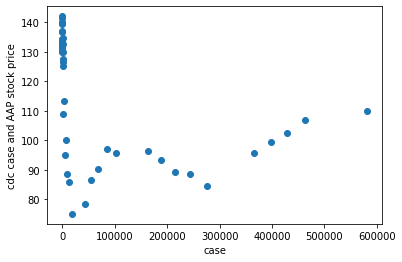

In [308]:
aap_stc = merge_data.iloc[:,8]
cases = merge_data.iloc[:,-2]
correlation = st.pearsonr(cases,aap_stc)
plt.scatter(cases,aap_stc)
plt.xlabel('case')
plt.ylabel("cdc case and AAP stock price")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

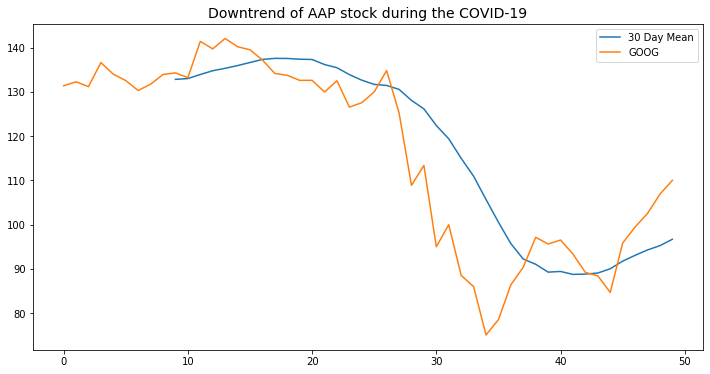

In [310]:
plt.figure(figsize=(12,6))
plt.title('Downtrend of AAP stock during the COVID-19', size=14)
merge_data["AAP"].rolling(window=10).mean().plot(label='30 Day Mean')
merge_data["AAP"].plot(label='GOOG')
plt.legend()
plt.show()
# .loc['2020-02-28':'2020-04-09']

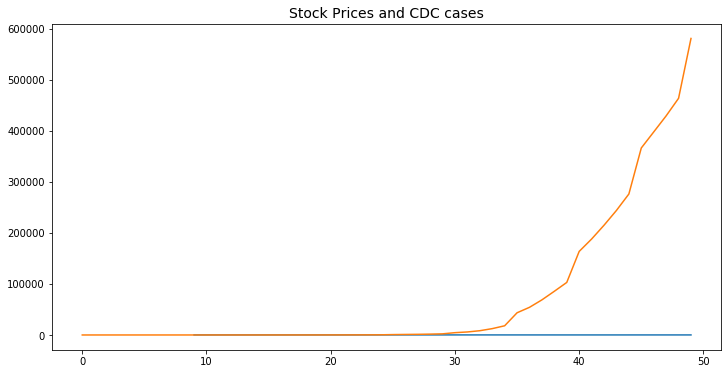

In [312]:
# plt.figure(figsize=(12,6))
# plt.title('Stock Prices and CDC cases', size=14)
# merge_data["AAP"].rolling(window=10).mean().plot(label='AAP MEAN')
# merge_data["cases"].plot(label='cases')
# # plt.legend()
# # plt.show()

AttributeError: 'Line2D' object has no property 'secondary_y'

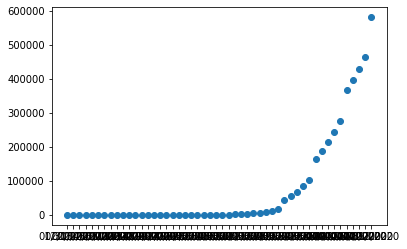

In [313]:
fig2 = plt.figure()

plt.plot_date(merge_data["date"], merge_data["cases"])
plt.plot_date(merge_data["date"], merge_data["AAP"], secondary_y=True)

fig2.autofmt_xdate()

plt.show()

<Figure size 1440x720 with 0 Axes>

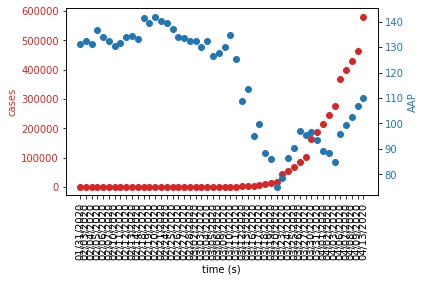

In [316]:
plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('cases', color=color)
ax1.plot_date(merge_data["date"], merge_data["cases"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('AAP', color=color)  # we already handled the x-label with ax1
ax2.plot_date(merge_data["date"], merge_data["AAP"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()